In [1]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
import pandas as pd
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from tqdm import tqdm
import wikipedia
import wikipediaapi
import re
import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

[nltk_data] Downloading package wordnet to /home/amrit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
syns = wordnet.synsets("program")

In [3]:
for i in syns:
    print(i.lemmas()[0].name())

plan
program
broadcast
platform
program
course_of_study
program
program
program
program


In [4]:
def get_entities(sent):
 
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    
  prv_tok_text = ""   

  prefix = ""
  modifier = ""
  
  for tok in nlp(sent):
    if tok.dep_ != "punct":
      if tok.dep_ == "compound":
        prefix = tok.text
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
 

  return [ent1.strip(), ent2.strip()]

In [5]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"},] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1
  if(k>0):
    span = doc[matches[k][1]:matches[k][2]] 
    return(span.text)
  

In [6]:
sent="who was skilled at karate"
verb=get_relation(sent)
actors=get_entities(sent)
whwords = ['what', 'which', 'how', 'why', 'when', 'where', 'who']

In [7]:
verb

'was skilled'

In [8]:
concept=""
if(actors[0] in whwords):
    concept=actors[1]
else:
    concept=actors[0]
concept

'karate'

In [9]:
search_results=wikipedia.search(concept, results=3)
wiki_wiki = wikipediaapi.Wikipedia(language='en',extract_format=wikipediaapi.ExtractFormat.WIKI)
p_wiki = wiki_wiki.page(search_results[0])
text_data=p_wiki.text

In [10]:
li=text_data.split(".")
li[10:15]

[' In this era of escalating Japanese militarism, the name was changed from 唐手 ("Chinese hand" or "Tang hand") to 空手 ("empty hand") – both of which are pronounced karate in Japanese – to indicate that the Japanese wished to develop the combat form in Japanese style',
 ' After World War II, Okinawa became (1945) an important United States military site and karate became popular among servicemen stationed there',
 'The martial-arts movies of the 1960s and 1970s served to greatly increase the popularity of martial arts around the world, and English-speakers began to use the word karate in a generic way to refer to all striking-based Asian martial arts',
 ' Karate schools began appearing across the world, catering to those with casual interest as well as those seeking a deeper study of the art',
 '\nShigeru Egami, Chief Instructor of Shotokan Dōjō, opined that "the majority of followers of karate in overseas countries pursue karate only for its fighting techniques ']

In [11]:
sentences = []
for i in li:
    l = i.split('.')
    for j in l:
        sentences.append(j)
sentences[10:15]

[' In this era of escalating Japanese militarism, the name was changed from 唐手 ("Chinese hand" or "Tang hand") to 空手 ("empty hand") – both of which are pronounced karate in Japanese – to indicate that the Japanese wished to develop the combat form in Japanese style',
 ' After World War II, Okinawa became (1945) an important United States military site and karate became popular among servicemen stationed there',
 'The martial-arts movies of the 1960s and 1970s served to greatly increase the popularity of martial arts around the world, and English-speakers began to use the word karate in a generic way to refer to all striking-based Asian martial arts',
 ' Karate schools began appearing across the world, catering to those with casual interest as well as those seeking a deeper study of the art',
 '\nShigeru Egami, Chief Instructor of Shotokan Dōjō, opined that "the majority of followers of karate in overseas countries pursue karate only for its fighting techniques ']

In [12]:
filtered_sentences=[]
for sentence in sentences:
    count = 0
    for words in sentence:
        if(words==" "):
            count = count+1
    if(count>=3):
        filtered_sentences.append(sentence)
filtered_sentences[10:15]

[' In this era of escalating Japanese militarism, the name was changed from 唐手 ("Chinese hand" or "Tang hand") to 空手 ("empty hand") – both of which are pronounced karate in Japanese – to indicate that the Japanese wished to develop the combat form in Japanese style',
 ' After World War II, Okinawa became (1945) an important United States military site and karate became popular among servicemen stationed there',
 'The martial-arts movies of the 1960s and 1970s served to greatly increase the popularity of martial arts around the world, and English-speakers began to use the word karate in a generic way to refer to all striking-based Asian martial arts',
 ' Karate schools began appearing across the world, catering to those with casual interest as well as those seeking a deeper study of the art',
 '\nShigeru Egami, Chief Instructor of Shotokan Dōjō, opined that "the majority of followers of karate in overseas countries pursue karate only for its fighting techniques ']

In [13]:
sentences=filtered_sentences
for val in range(len(sentences)):
    sentences[val]=re.sub("\[(.*?)\]","",sentences[val])
sentences[10:15]

[' In this era of escalating Japanese militarism, the name was changed from 唐手 ("Chinese hand" or "Tang hand") to 空手 ("empty hand") – both of which are pronounced karate in Japanese – to indicate that the Japanese wished to develop the combat form in Japanese style',
 ' After World War II, Okinawa became (1945) an important United States military site and karate became popular among servicemen stationed there',
 'The martial-arts movies of the 1960s and 1970s served to greatly increase the popularity of martial arts around the world, and English-speakers began to use the word karate in a generic way to refer to all striking-based Asian martial arts',
 ' Karate schools began appearing across the world, catering to those with casual interest as well as those seeking a deeper study of the art',
 '\nShigeru Egami, Chief Instructor of Shotokan Dōjō, opined that "the majority of followers of karate in overseas countries pursue karate only for its fighting techniques ']

In [14]:
df=pd.DataFrame(sentences)
df.head()

,0
0,Karate (空手) (; Japanese pronunciation: (listen); Okinawan pronunciation: ) is a martial art developed in the Ryukyu Kingdom
1,"It developed from the indigenous Ryukyuan martial arts (called te (手), ""hand""; tii in Okinawan) under the influence of Kung Fu, particularly Fujian White Crane"
2,"Karate is now predominantly a striking art using punching, kicking, knee strikes, elbow strikes and open-hand techniques such as knife-hands, spear-hands and palm-heel strikes"
3,"Historically, and in some modern styles, grappling, throws, joint locks, restraints and vital-point strikes are also taught"
4,"A karate practitioner is called a karateka (空手家), and its plural is ""karateka"" or ""karatekas"""


In [15]:
df['sentence']=df[0]
df=df.drop([0],axis=1)
df.head()

,sentence
0,Karate (空手) (; Japanese pronunciation: (listen); Okinawan pronunciation: ) is a martial art developed in the Ryukyu Kingdom
1,"It developed from the indigenous Ryukyuan martial arts (called te (手), ""hand""; tii in Okinawan) under the influence of Kung Fu, particularly Fujian White Crane"
2,"Karate is now predominantly a striking art using punching, kicking, knee strikes, elbow strikes and open-hand techniques such as knife-hands, spear-hands and palm-heel strikes"
3,"Historically, and in some modern styles, grappling, throws, joint locks, restraints and vital-point strikes are also taught"
4,"A karate practitioner is called a karateka (空手家), and its plural is ""karateka"" or ""karatekas"""


In [16]:
candidate_sentences=df
candidate_sentences['sentence'].sample(5)

242                                                                                 Choi, a significant figure in taekwondo history, had also studied karate under Funakoshi
109                                                           \nKarate training is commonly divided into kihon (basics or fundamentals), kata (forms), and kumite (sparring)
169     The World Union of Karate-do Federations (WUKF) offers different styles and federations a world body they may join, without having to compromise their style or size
287                                          In 1959 he founded the Southern California Karate Association (SCKA) which was renamed Shotokan Karate of America (SKA) in 1969
294                                                                               \n\nIn film and popular culture\nKarate spread rapidly in the West through popular culture
Name: sentence, dtype: object

In [17]:
entity_pairs = []
for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 301/301 [00:02<00:00, 107.35it/s]


In [18]:
entity_pairs[:5]

[['Japanese Okinawan pronunciation', 'martial Ryukyu Kingdom'],
 ['It', 'martial Kung Fu'],
 ['Karate', 'such knife hands'],
 ['modern  grappling', 'modern  styles'],
 ['karateka  plural', '']]

In [19]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 301/301 [00:02<00:00, 126.49it/s]


In [20]:
pd.Series(relations).value_counts()[:50]

referred to           5
is                    4
moved to              4
went to               2
sent to               2
founded by            2
divided into          2
written as            2
Federation            2
came to               2
introduced to         2
were few              1
had particular        1
Ryu                   1
coordinate with       1
called                1
Funakoshi             1
awarded based         1
unified under         1
divided by            1
means                 1
changed to            1
train in              1
adopted               1
emphasizes aerobic    1
ended in              1
used in               1
practiced as          1
done by               1
traveled to           1
gave                  1
was                   1
described to          1
"In                   1
used by               1
began as              1
ends with             1
descended from        1
karate as             1
were identical        1
began in              1
developed from  

In [21]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})


In [22]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/home/amrit/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amrit/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amrit/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amrit/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amrit/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amrit/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Gl

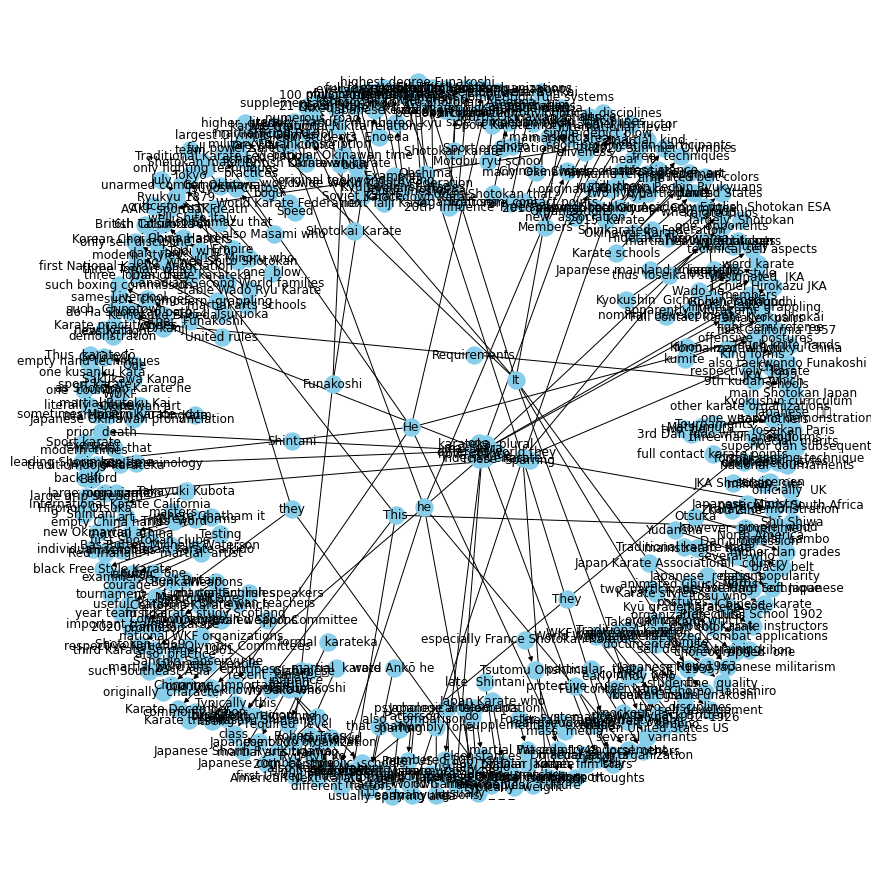

In [23]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [25]:
kg_df.head()

,source,target,edge
0,Japanese Okinawan pronunciation,martial Ryukyu Kingdom,is
1,It,martial Kung Fu,developed from
2,Karate,such knife hands,None
3,modern grappling,modern styles,None
4,karateka plural,,None
